# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#df = pd.read_csv('../data/human_body_temperature.csv')
df = pd.read_csv('E://springboard//mini_project//EDA_human_temp//data/human_body_temperature.csv')

#### Answer 1. 
The body temperature can be seen as normal distribution from above graphical and statistical analysis. 

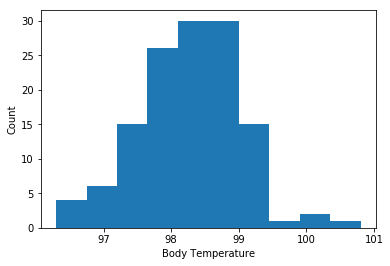

In [2]:
# Your work here.

# plot the temperature data
_ = plt.hist(df['temperature'])
plt.xlabel('Body Temperature')
plt.ylabel('Count')
plt.show()

In [3]:
# statistical analysis on test of normal distribution
from scipy.stats import shapiro
stat, p = shapiro(df['temperature'])
if p > 0.05:
    print('Sample looks like Normal Distribution (Null Hypothesis is accepted)')
else:
    print('Sample does not Normal Distribution (Null Hypothesis is rejected)')

Sample looks like Normal Distribution (Null Hypothesis is accepted)


#### Answer 2
The sample size is large enough. Although there is no replacement for sampling, our sample size is pretty large. We can see our observations as independent.

In [4]:
if len(df['temperature']) > 10:
    print('The sampling data is large enough')
else:
    print('The sampling data is not large enough')

The sampling data is large enough


#### Answer 3

<p>Bootstrapping test shows May Not.</p>

<p>T test shows May Not. One sample testing is selected. In this sample, only one sample and its expected true mean of population is told. </p> 

<p>It is not appropriate to use t or z statistics directly. In t statistics, the sample size would be less than 30. z statistics needs to know the true standard deviation of population. We do not know that yet </p>

<p> p-value of z statistics is less than t-statistics. the sample size is larger than 30. It is better for z statistics.</p>

In [5]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [6]:
temp = df['temperature'].values
temp_shifted = temp - np.mean(temp) + 98.6
bs_replicates_temp = draw_bs_reps(temp_shifted, np.mean, 10000)
p = np.sum( bs_replicates_temp <= np.mean(temp)) / 10000
if p > 0.05:
    print('p:', p, 'Bootstrapping test: The true population mean is really 98.6 degrees F \
(Null Hypothesis is accepted)')
else:
    print('p:', p, 'Bootstrapping test: The true population mean may not be really 98.6 degrees F \
(Null Hypothesis is rejected)')

p: 0.0 Bootstrapping test: The true population mean may not be really 98.6 degrees F (Null Hypothesis is rejected)


In [10]:
# try t test

stat, pvalue = stats.ttest_1samp(temp, 98.6)
if pvalue > 0.05:
    print('p:', pvalue, 't test: The true population mean is really 98.6 degrees F \
    (Null Hypothesis is accepted)')
else:
    print('p:', pvalue, 't test: The true population mean may not be really 98.6 degrees F \
(Null Hypothesis is rejected)')

p: 2.41063204156e-07 t test: The true population mean may not be really 98.6 degrees F (Null Hypothesis is rejected)


In [11]:
# try z test

from statsmodels.stats import weightstats as stests

ztest ,pval = stests.ztest(temp, x2=None, value=98.6)
if pval > 0.05:
    print('p:', pval, 'z test: The true population mean is really 98.6 degrees F (Null Hypothesis is accepted)')
else:
    print('p:', pval, 'z test: The true population mean may not be really 98.6 degrees F \
(Null Hypothesis is rejected)')

p: 4.9021570141e-08 z test: The true population mean may not be really 98.6 degrees F (Null Hypothesis is rejected)


#### Answer 4
<p>t statistics is appropriate to use because the sample size is less than 30.</p>

<p>P-value of both statistics increase and the null hypothesis is accepted. The sample size really matters when choosing the statistics.Meanwhile, the true mean and standard deviation of population are also very important to determine which statistics to choose. </p>

In [12]:
sample = np.random.choice(temp, 30)
tstat, pvalue = stats.ttest_1samp(sample, 98.6)
if pvalue > 0.05:
    print('p:', pvalue, 't test: The true population mean is really 98.6 degrees F (Null Hypothesis is accepted)')
else:
    print('p:', pvalue, 't test: The true population mean may not be really 98.6 degrees F\
(Null Hypothesis is rejected)')

p: 0.144691524455 t test: The true population mean is really 98.6 degrees F (Null Hypothesis is accepted)


In [13]:
ztest, pval = stests.ztest(sample, x2=None, value=98.6)
if pval > 0.05:
    print('p:', pval, 'z test: The true population mean is really 98.6 degrees F (Null Hypothesis is accepted)')
else:
    print('p:', pval, 'z test: The true population mean may not be really 98.6 degrees F \
(Null Hypothesis is rejected)')

p: 0.13388343978 z test: The true population mean is really 98.6 degrees F (Null Hypothesis is accepted)


In [16]:
#sample_shifted = sample - np.mean(sample) + 98.6
bs_replicates = draw_bs_reps(sample, np.mean, 10)
p = np.sum( bs_replicates <= np.mean(sample)) / 10
if p > 0.05:
    print('p:', p, 'Bootstrapping test: The true population mean is really 98.6 degrees F \
(Null Hypothesis is accepted)')
else:
    print('p:', p, 'Bootstrapping test: The true population mean may not be really 98.6 degrees F \
(Null Hypothesis is rejected)')

p: 0.5 Bootstrapping test: The true population mean is really 98.6 degrees F (Null Hypothesis is accepted)


#### Answer 5
<p>Bootstrap appraoch is also used below.</p>

<p>We find Temperature beyond  (97.580494464359049, 98.779505535640936)  is seen "abnormal".</p>

In [12]:
z_critical = stats.norm.ppf(q = 0.975)
std = temp.std()
margin_of_error = z_critical * (std / np.sqrt(10))
confidence_interval = (temp.mean() - margin_of_error,
                      temp.mean() + margin_of_error)
print('Temperature beyond ', confidence_interval, ' is seen "abnormal".')

Temperature beyond  (97.796558646060419, 98.70190289240108)  is seen "abnormal".


#### Answer 6
<p>ks test is used in this statistical testing. the sampling sizes of male and female are over 30. Meanwhile, we are comparing two sampling significance difference. Two samples of KS test can meet these requirements. </p>

<p>From the investigation by Carl Wunderlich， we raise a few questions: 
    <ul>
        <li>The human body's average temperture is really 37C or 98.6 F degree? 
        <li>What kind of temperature should be seen as 'abnormal'?
        <li>Is there any significant difference between males and females in normal temperature?
    </ul>

We need to implement EDA for these questions, compose our hypothesis and rephrase our questions:
    <ul>
        <li> H0: The human body's average temperture is really 37C or 98.6 F degree 
        <li> Ha: The human body's average temperture may not be really 37C or 98.6 F degree 
    </ul>
    <ul>
        <li>What confidence intervals of temperature should be?
    </ul>
    <ul>
        <li> H0: There is no significant difference between males and females in normal temperature?
        <li> Ha: There is no significant difference between males and females in normal temperature?
    </ul>
    
Through our statistics, we find a few conclusions:
    <ul>
        <li>The human body's average temperture may not be really 37C or 98.6 F degree. 
        <li>Temperature between 97.796558646060419, 98.70190289240108 F degree should be seen as 'abnormal'.
        <li>There is no significant difference between males and females in normal temperature.
    </ul>

</p>

In [13]:
temp_m = df[(df['gender'] == 'M') & (df['temperature'] >= confidence_interval[0]) &\
            (df['temperature'] <= confidence_interval[1])]['temperature'].values
temp_f = df[(df['gender'] == 'F') & (df['temperature'] >= confidence_interval[0]) &\
            (df['temperature'] <= confidence_interval[1])]['temperature'].values

In [14]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [15]:
x, y = ecdf(temp)
x_m, y_m = ecdf(temp_m)
x_f, y_f = ecdf(temp_f)

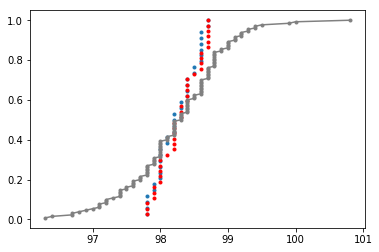

In [16]:
_ = plt.plot(x_m, y_m, marker='.', linestyle='none')
_ = plt.plot(x_f, y_f, marker='.', linestyle='none', color='red')
_ = plt.plot(x, y, marker='.', color='grey')
plt.show()

In [18]:
kstat, ksp = stats.ks_2samp(temp_m, temp_f)

In [21]:
if ksp > 0.05:
    print('p:', ksp, 'ks test: There is no significance difference  between males and females in normal temperature \
(Null Hypothesis is accepted)')
else:
    print('p:', ksp, 'ks test: There is significance difference  between males and females in normal temperature\
(Null Hypothesis is rejected)')

p: 0.987383785764 ks test: The true population mean is really 98.6 degrees F (Null Hypothesis is accepted)
